<a href="https://colab.research.google.com/github/troogg/Previsao_IBOVESPA/blob/main/FIAP_Tech_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O problema:**

Imagine que você foi escalado para um time de investimentos e precisará realizar um modelo preditivo com dados da IBOVESPA (Bolsa de valores) para criar uma série temporal e prever diariamente o fechamento da base. Você precisará demonstrar para o time de investimentos.



## **A solução:**

Escolhemos trabalhar com o [Prophet](https://facebook.github.io/prophet/docs/quick_start.html), pois foi indicado em uma das lives com o professor:

In [ ]:
import logging
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Configurar o nível de logging para cmdstanpy para suprimir mensagens DEBUG e INFO
logger = logging.getLogger('cmdstanpy')
logger.setLevel(logging.WARNING)


Este bloco de código é responsável por importar todas as bibliotecas necessárias para o projeto. O logging é configurado para suprimir mensagens menos importantes para que não poluam a saída do seu notebook. As bibliotecas importadas incluem pandas para manipulação de dados, Prophet para a modelagem de séries temporais, sklearn para dividir os dados e calcular métricas de erro, e numpy para operações matemáticas.

In [ ]:
# Carregar dataframe
data = pd.read_csv('Dados Históricos - Ibovespa - 22.07.2020 - 22.07.2024.csv')

# Converter a coluna de data para o formato datetime e renomear a coluna de fechamento
data['Data'] = pd.to_datetime(data['Data'], format='%d.%m.%Y')
data.rename(columns={'Último': 'y', 'Data': 'ds'}, inplace=True)


Aqui, carregamos os dados históricos do IBOVESPA de um arquivo CSV. O formato da data é convertido para que o Python possa entender que se trata de uma data, e as colunas são renomeadas para 'ds' (data) e 'y' (valor que queremos prever), conforme o Prophet espera.

In [ ]:
# Dividir os dados em treino e teste
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, shuffle=False)


Os dados são divididos em dois conjuntos: um para treinar nosso modelo (train_data) e outro para testar sua precisão (test_data). A divisão é de 80% para treino e 20% para teste. Usamos random_state para garantir que a divisão seja sempre a mesma toda vez que o código é executado.

In [ ]:
# Inicializar e configurar o modelo Prophet
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.add_country_holidays(country_name='BR')

# Treinar o modelo
model.fit(train_data)


Neste bloco, inicializamos o modelo Prophet, ativando as sazonalidades diária e anual e adicionando feriados nacionais brasileiros para melhorar a previsão. Em seguida, o modelo é treinado usando os dados de treinamento.

In [ ]:
# Preparar datas futuras para previsões
futuro = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(futuro)

# Avaliar o modelo
predictions = forecast[-len(test_data):]['yhat']
real_values = test_data['y']
rmse = np.sqrt(mean_squared_error(real_values, predictions))
mae = mean_absolute_error(real_values, predictions)
accuracy = 1 - mae / real_values.mean()

print('\nMétrica e Acurácia\n')
print('RMSE:', rmse)
print('MAE:', mae)
print('Accuracy:', accuracy)



Métrica e Acurácia

RMSE: 15.6218107000084
MAE: 12.304413929815267
Accuracy: 0.8881246458113503


Então, fazemos previsões usando o modelo treinado. As datas futuras são geradas e o modelo faz suas previsões para esses dias. Avaliamos o modelo usando métricas como RMSE (Root Mean Squared Error) e MAE (Mean Absolute Error) para entender o quão bem o modelo está performando e calculamos a acurácia como uma métrica de performance geral.

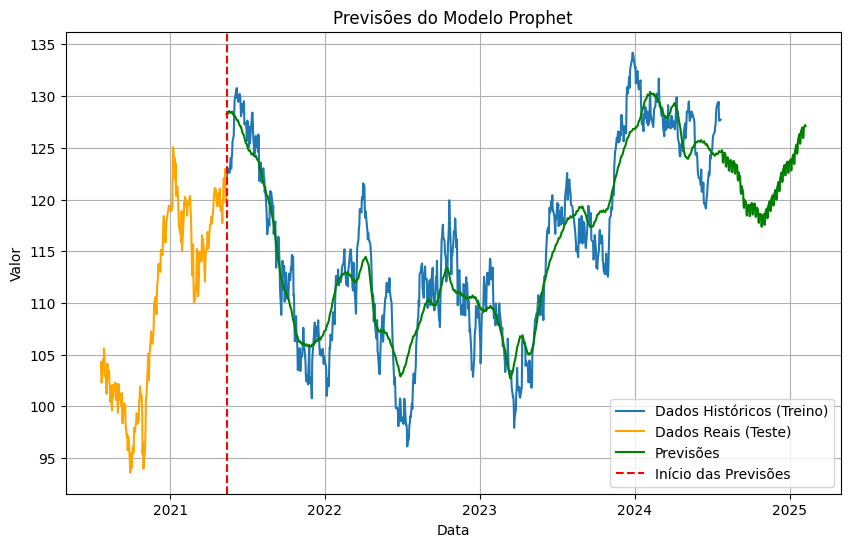

In [ ]:
# Plotar os dados históricos e as previsões
plt.figure(figsize=(10, 6))
plt.plot(train_data['ds'], train_data['y'], label='Dados Históricos (Treino)')
plt.plot(test_data['ds'], test_data['y'], label='Dados Reais (Teste)', color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Previsões', color='green')

# Destacar o período de previsão
plt.axvline(x=train_data['ds'].iloc[-1], color='red', linestyle='--', label='Início das Previsões')

plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Previsões do Modelo Prophet')
plt.grid(":")
plt.legend()
plt.show()


O gráfico nos ajuda a compreender visualmente as previsões e a margem de erro dentro de cada periodo.